In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
%cd /content/drive/MyDrive/flightdelays/flight-delays-data

/content/drive/.shortcut-targets-by-id/1mwZTaqHZBpEdOqwQ5Juk6Jx561pMW0rg/flight-delays-data


**Importing Libraries**

In [3]:
import pandas as pd
import sklearn as sc
import numpy as np
import matplotlib as mat
from matplotlib import pyplot as plt
import seaborn as sb

In [ ]:
#2021 Datasets
january = pd.read_csv("flight-dataset-january.zip")
february = pd.read_csv("flight-dataset-feb.zip")
march = pd.read_csv("flight-dataset-march.zip")
april = pd.read_csv("flight-dataset-april.zip")
may = pd.read_csv("flight-dataset-may.zip")
june = pd.read_csv("flight-dataset-june.zip")
july = pd.read_csv("flight-dataset-july.zip")

In [ ]:
#2020 Datasets
august = pd.read_csv("flight-dataset-august.zip")
september = pd.read_csv("flight-dataset-september.zip")
october = pd.read_csv("flight-dataset-october.zip")
november = pd.read_csv("flight-dataset-november.zip")
december = pd.read_csv("flight-dataset-december.zip")

In [ ]:
combined = january
combined = combined.append(february)
combined = combined.append(march)
combined = combined.append(april)
combined = combined.append(may)
combined = combined.append(june)
combined = combined.append(july)
combined = combined.append(august)
combined = combined.append(september)
combined = combined.append(october)
combined = combined.append(november)
combined = combined.append(december)

In [ ]:
combined.to_csv("Combined.csv",  index=False)

NameError: ignored

# Working with combined Data

In [4]:
combined = pd.read_csv("Final.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,10,47,65,69,71) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
combined = combined.dropna(subset=['OP_CARRIER_AIRLINE_ID'])
combined = combined.dropna(subset=['TAIL_NUM'])
combined = combined.dropna(subset=['DEP_TIME'])
combined = combined.dropna(subset=['DEP_DELAY'])
combined = combined.dropna(subset=['TAXI_IN'])
combined = combined.dropna(subset=['WHEELS_ON'])

In [9]:
combined = combined.dropna(subset=['ARR_DELAY'])

In [10]:
del combined["Unnamed: 60"]
del combined["Unnamed: 61"]
del combined["Unnamed: 63"]
del combined["Unnamed: 64"]

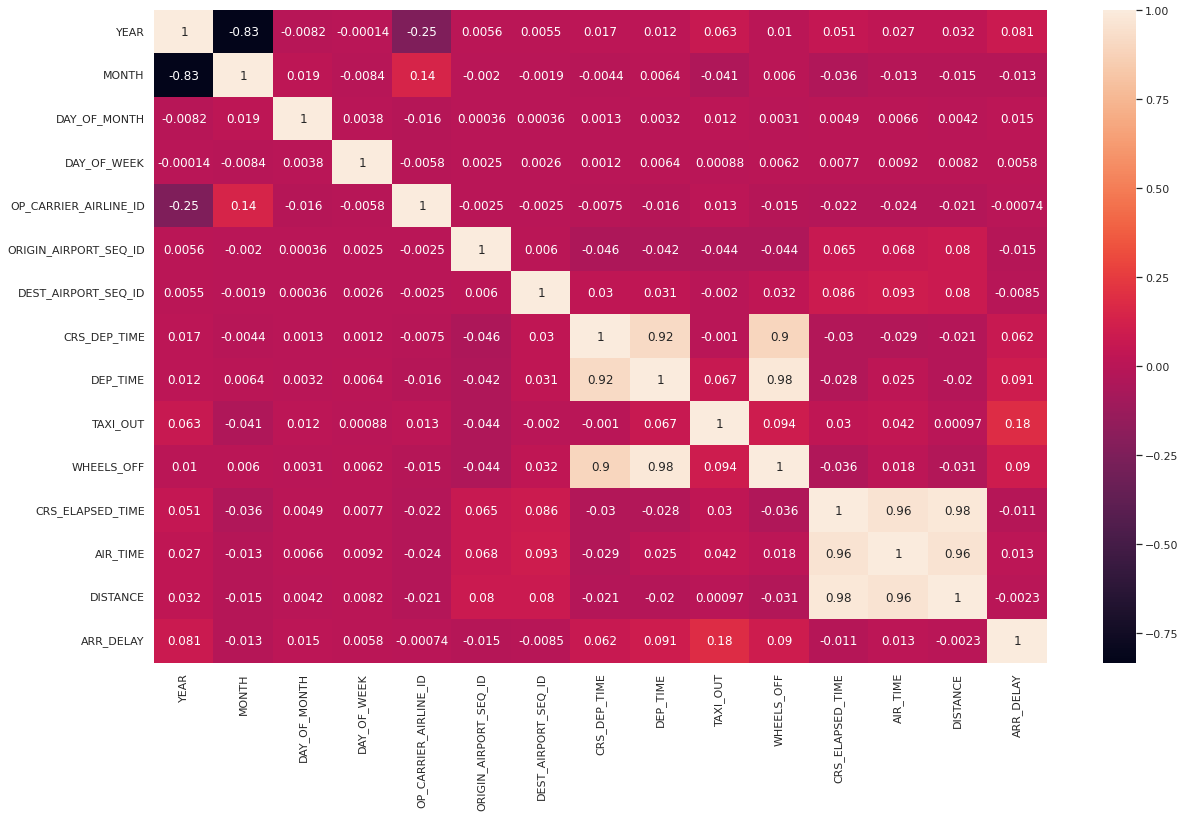

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(20,12)})
df = combined[useful_cols_arrival]
sns.heatmap(df.corr(),annot = True);

# Baseline Modelling

Linear Regression

In [13]:
useful_cols_arrival = ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID', 'CRS_DEP_TIME', 'DEP_TIME','TAXI_OUT', 'WHEELS_OFF', 'CRS_ELAPSED_TIME', 'AIR_TIME','DISTANCE','ARR_DELAY']
useful_cols_departure = ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'CRS_DEP_TIME', 'FLIGHTS']

In [ ]:
#Here, we train our Linear Regression model on the called feature and calculate the RMSE and P-value.
import sklearn
from sklearn.model_selection import train_test_split, permutation_test_score
from sklearn.linear_model import LinearRegression
X = combined[useful_cols_arrival]
y = combined['ARR_DELAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
linreg = LinearRegression().fit(X_train, y_train)
testPred = linreg.predict(X_test)


In [ ]:
from sklearn import metrics

# R squared value
metrics.explained_variance_score(y_test, testPred)

0.11486527866504359

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, testPred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, testPred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, testPred)))

Mean Absolute Error: 15.929882686230645
Mean Squared Error: 1826.0238285620596
Root Mean Squared Error: 42.7320000533799


In [ ]:
 from sklearn.model_selection import train_test_split, permutation_test_score
_, _, p_value = permutation_test_score(linreg, X_test, y_test, scoring="neg_root_mean_squared_error", cv=None, n_permutations=50)
print("Test rmse = ", np.sqrt(np.mean(np.square((y_test - testPred)))))
print("p-value = ", p_value)

Test rmse =  5.486429551925301
p-value =  0.0196078431372549


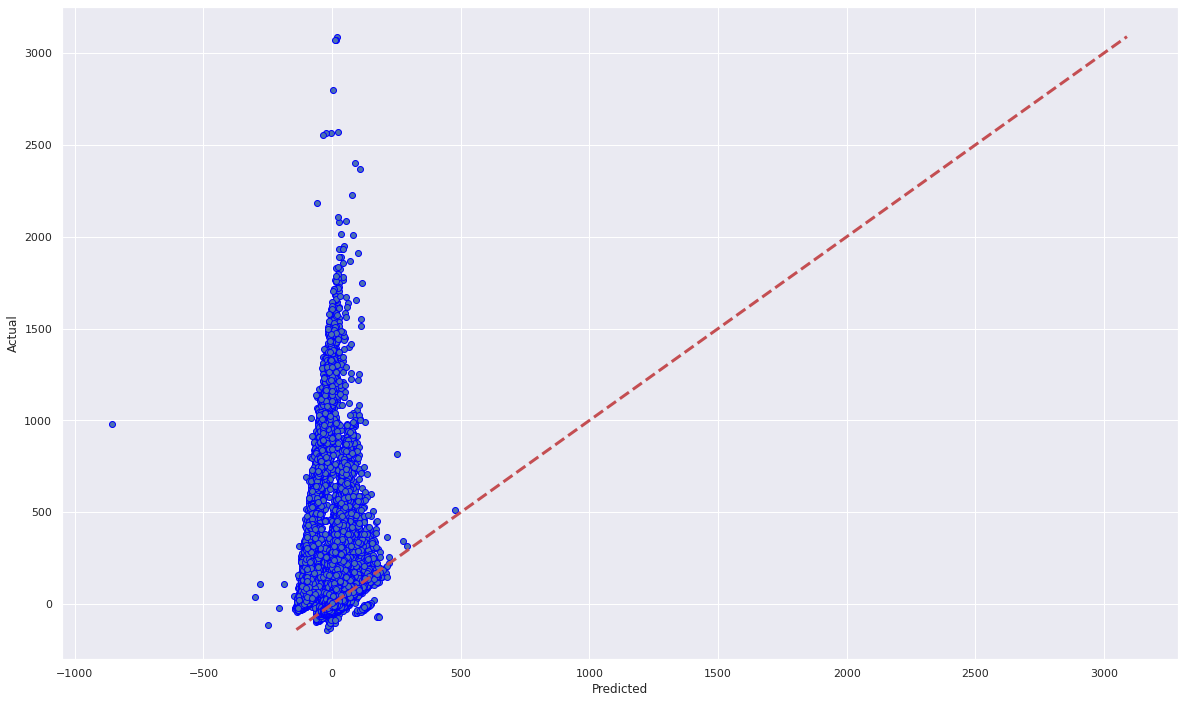

In [ ]:
fig, ax = plt.subplots()
ax.scatter(testPred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Decision Tree

In [17]:
#Here, we train our Linear Regression model on the called feature and calculate the RMSE and P-value.
import sklearn
from sklearn.model_selection import train_test_split, permutation_test_score
from sklearn.tree import DecisionTreeRegressor
X = combined[useful_cols_arrival]
y = combined['ARR_DELAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
dt = DecisionTreeRegressor(random_state = 0).fit(X_train, y_train)
testPred_rf = dt.predict(X_test)

In [18]:
from sklearn import metrics

# R squared value
metrics.explained_variance_score(y_test, testPred_rf)

0.7354520700792755

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, testPred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, testPred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, testPred_rf)))

Mean Absolute Error: 9.764879539852796
Mean Squared Error: 545.7618692360281
Root Mean Squared Error: 23.361546807436106


In [ ]:
 from sklearn.model_selection import train_test_split, permutation_test_score
_, _, p_value = permutation_test_score(dt, X_test, y_test, scoring="neg_root_mean_squared_error", cv=None, n_permutations=50)
print("Test rmse = ", np.sqrt(np.mean(np.square((y_test - testPred_rf)))))
print("p-value = ", p_value)

## Store Model

In [20]:
import pickle

In [22]:
# save the model to disk
filename = 'decisionTreeLatest.sav'
pickle.dump(dt, open(filename, 'wb'))

# Extra Graphs

In [ ]:
graph1 = combined.groupby(['MKT_CARRIER_AIRLINE_ID'], as_index=False)['DEP_DELAY'].sum()

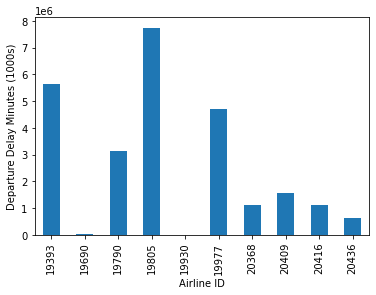

In [ ]:
graph1.plot(x = "MKT_CARRIER_AIRLINE_ID", y = "DEP_DELAY", kind = "bar", xlabel="Airline ID", ylabel="Departure Delay Minutes (1000s)", legend = 0)
plt.show()

In [ ]:
graph2 = combined.groupby(['ORIGIN_STATE_NM'], as_index=False)['DEP_DELAY'].sum()
graph2_df = graph2.sort_values(by = 'DEP_DELAY')

In [ ]:
total = graph2["DEP_DELAY"].sum()

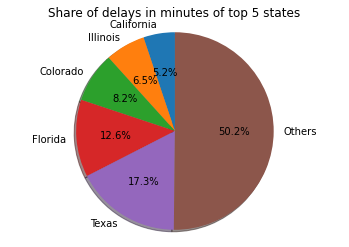

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(graph2_df["ORIGIN_STATE_NM"].tail())
labels.append("Others")
sizes = list(graph2_df["DEP_DELAY"].tail())
othersize = total - sum(sizes)
sizes.append(othersize)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Share of delays in minutes of top 5 states")
plt.show()

#Weather Data

In [23]:
weather = pd.read_csv("JFK.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,64,68,70,75,81,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
weathercols = weather.columns

In [27]:
useful_cols_arrival = ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID', 'ARR_DELAY', 'CRS_DEP_TIME', 'DEP_TIME','TAXI_OUT', 'WHEELS_OFF', 'CRS_ELAPSED_TIME', 'AIR_TIME','FLIGHTS','DISTANCE','HourlyWindSpeed', 'HourlyVisibility','HourlyStationPressure', 'HourlyRelativeHumidity','HourlyPrecipitation', 'HourlyDryBulbTemperature']
useful_cols_departure = ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'CRS_DEP_TIME', 'FLIGHTS']

In [28]:
weather["HourlyVisibility"] = weather["HourlyVisibility"].astype('str')
weather["HourlyVisibility"] = weather["HourlyVisibility"].apply(lambda x : x.strip("s*V"))
weather["HourlyVisibility"] = weather["HourlyVisibility"].apply(lambda x : 0 if x == '' else x )
weather["HourlyVisibility"] = weather["HourlyVisibility"].astype('float')

In [29]:
weather["HourlyStationPressure"] = weather["HourlyStationPressure"].astype('str')
weather["HourlyStationPressure"] = weather["HourlyStationPressure"].apply(lambda x : x.strip("s*V"))
weather["HourlyStationPressure"] = weather["HourlyStationPressure"].apply(lambda x : 0 if x == '' else x )
weather["HourlyStationPressure"] = weather["HourlyStationPressure"].astype('float')

In [30]:
weather["HourlyRelativeHumidity"] = weather["HourlyRelativeHumidity"].astype('str')
weather["HourlyRelativeHumidity"] = weather["HourlyRelativeHumidity"].apply(lambda x : x.strip("s*V"))
weather["HourlyRelativeHumidity"] = weather["HourlyRelativeHumidity"].apply(lambda x : 0 if x == '' else x )
weather["HourlyRelativeHumidity"] = weather["HourlyRelativeHumidity"].astype('float')

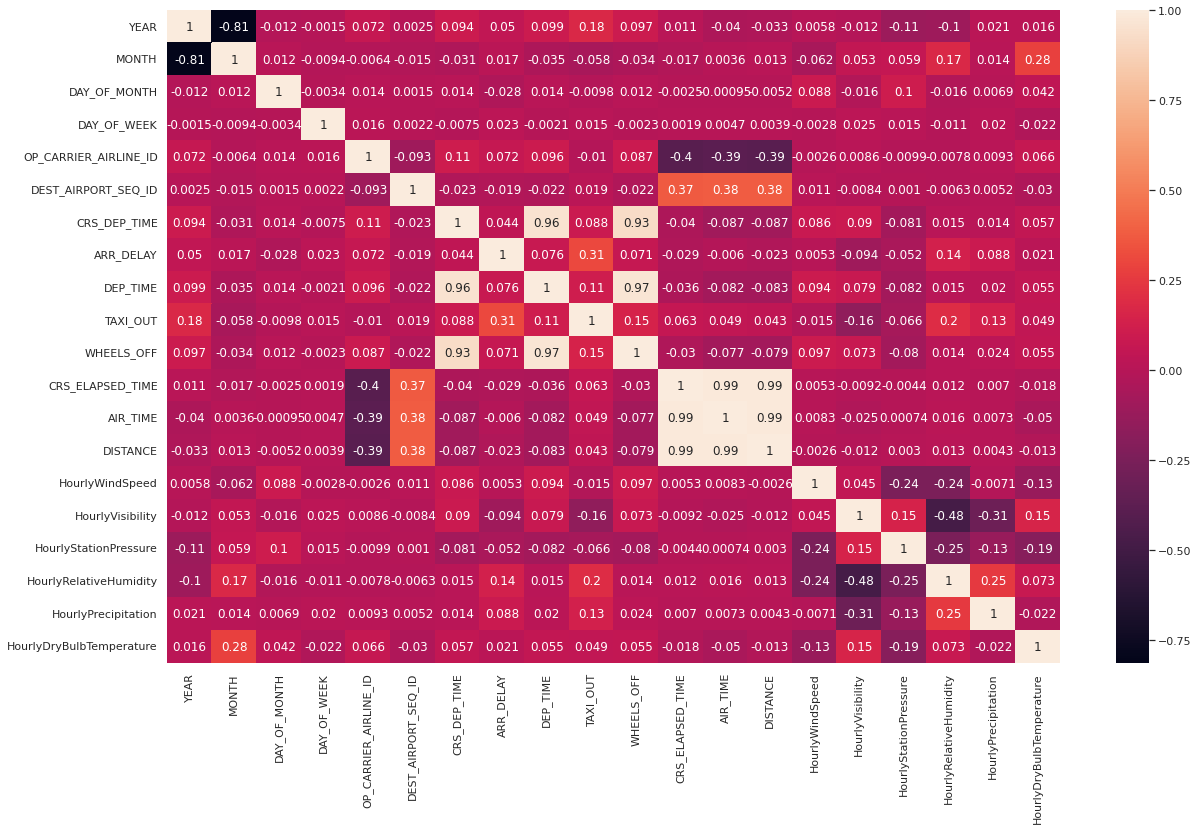

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(20,12)})
df = weather[useful_cols_arrival]
sns.heatmap(df.corr(),annot = True);

#Decision Tree

In [31]:
weather = weather.dropna(subset=['OP_CARRIER_AIRLINE_ID'])
weather = weather.dropna(subset=['TAIL_NUM'])
weather = weather.dropna(subset=['DEP_TIME'])
weather = weather.dropna(subset=['DEP_DELAY'])
weather = weather.dropna(subset=['TAXI_IN'])
weather = weather.dropna(subset=['WHEELS_ON'])
weather = weather.dropna(subset=['ARR_DELAY'])

In [32]:
weather = weather.dropna(subset=['HourlyWindSpeed'])

In [33]:
weather = weather[useful_cols_arrival]

In [35]:
useful_cols_arrival = ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID', 'CRS_DEP_TIME', 'DEP_TIME','TAXI_OUT', 'WHEELS_OFF', 'CRS_ELAPSED_TIME', 'AIR_TIME','FLIGHTS','DISTANCE','HourlyWindSpeed', 'HourlyVisibility','HourlyStationPressure', 'HourlyRelativeHumidity','HourlyPrecipitation', 'HourlyDryBulbTemperature']

In [36]:
#Here, we train our Linear Regression model on the called feature and calculate the RMSE and P-value.
import sklearn
from sklearn.model_selection import train_test_split, permutation_test_score
from sklearn.tree import DecisionTreeRegressor
X = weather[useful_cols_arrival]
y = weather['ARR_DELAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
dt = DecisionTreeRegressor(random_state = 0).fit(X_train, y_train)
testPred_rf = dt.predict(X_test)

In [37]:
from sklearn import metrics

# R squared value
metrics.explained_variance_score(y_test, testPred_rf)

0.3524786920352202

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, testPred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, testPred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, testPred_rf)))

Mean Absolute Error: 18.67976338275031
Mean Squared Error: 1983.0758294992575
Root Mean Squared Error: 44.53173957414259
